<a href="https://colab.research.google.com/github/Aayush-Borkar/ML-Lab/blob/main/ML_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)   # to ignore future warnings

In [5]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Filtering out rows with non-numerical values in 'TotalCharges' column:
non_numeric_rows= df[pd.to_numeric(df['TotalCharges'],errors='coerce').isna()]
non_numeric_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Replacing the blank values in TotalCharges column:

df.loc[df['TotalCharges']==" ", 'TotalCharges']=  df.loc[df['TotalCharges']==" ", 'MonthlyCharges']

In [9]:
# Converting TotalCharges into float data type:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [10]:
# Calculating memory usage before data type conversions:

initial_memory= df.memory_usage().sum()/1024**2
print("memory usage: ",initial_memory,"MB")

memory usage:  1.1285362243652344 MB


In [11]:
# Printing the number of unique values corresponding to each column:

print("Here are the columns with their corresponding number of unique values:")
for i in df.columns:
    print(i," : ",df[i].nunique())

Here are the columns with their corresponding number of unique values:
customerID  :  7043
gender  :  2
SeniorCitizen  :  2
Partner  :  2
Dependents  :  2
tenure  :  73
PhoneService  :  2
MultipleLines  :  3
InternetService  :  3
OnlineSecurity  :  3
OnlineBackup  :  3
DeviceProtection  :  3
TechSupport  :  3
StreamingTV  :  3
StreamingMovies  :  3
Contract  :  3
PaperlessBilling  :  2
PaymentMethod  :  4
MonthlyCharges  :  1585
TotalCharges  :  6534
Churn  :  2


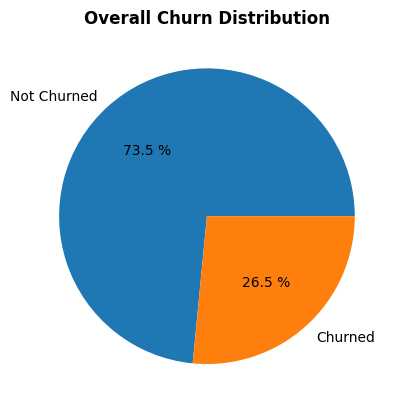

In [12]:
# Creating a pie chart for overall churn distribution:

churncounts=df['Churn'].value_counts()
plt.pie(churncounts, autopct='%1.1f %%',labels= ['Not Churned','Churned'])
plt.title("Overall Churn Distribution",fontweight='bold')
plt.show()


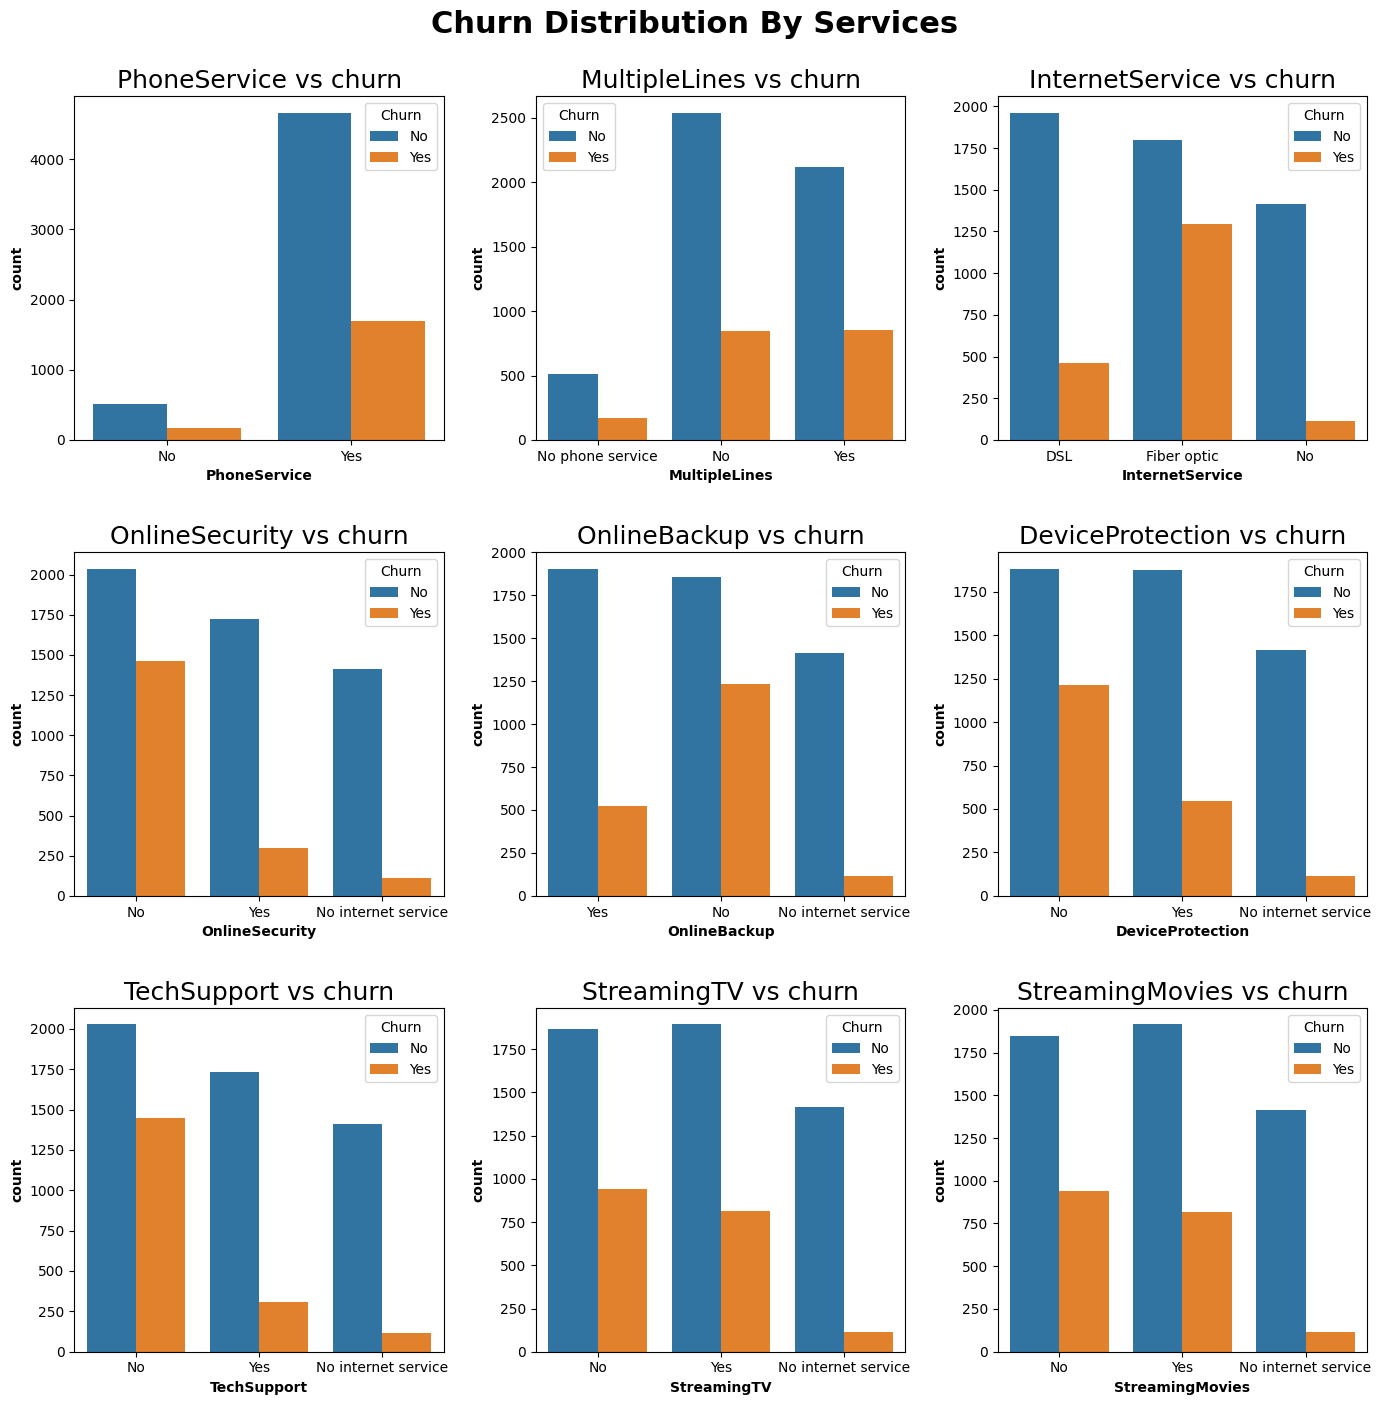

In [13]:
# Creating subplots for the distribution or churn by each service:

fig,axes= plt.subplots(3,3, figsize=(14,14))
axes= axes.flatten()

service_cols= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for i, service in enumerate(service_cols):
    sns.countplot(data=df,x=service, hue='Churn',ax=axes[i])
    axes[i].set_title(f"{service} vs churn", fontsize= 18)
    axes[i].set_xlabel(service, fontweight='bold')
    axes[i].set_ylabel("count", fontweight='bold')


plt.suptitle("Churn Distribution By Services", fontsize=22, fontweight='bold', y=1)
plt.tight_layout(h_pad=3)
plt.show()

Phone service and Multiple Lines:

A small portion of customers do not use phone services, and their churn rate is almost same as those who do.
Customers using multiple lines show a slightly higher churn rate compared to those using a single line, which may indicate a preference for simpler, more cost-effective options.
Internet Service:

Customers using fiber optic service exhibit significantly higher churn rates compared to those using DSL. This suggests potential dissatisfaction with fiber optic service or its pricing.
Notably, a large portion of customers do not use internet service at all, and their churn rate is minimal. These customers might be using the service primarily for phone or TV purposes.
Online Security and Tech Support:

A significant proportion of customers without online security or tech support have churned, while customers who opted for these services have a much lower churn rate.This indicates that security and technical support play a crucial role in customer retention. Offering bundled plans or emphasizing these services might help reduce churn.
Online Backup and Device Protection:

Churn is lower among customers who subscribed to online backup or device protection services compared to those who did not. These services might be helping to enhance customer loyalty.
Streaming TV and Streaming Movies:

Customers who did not subscribe to streaming services have a slightly higher churn rate compared to those who did. This suggests that entertainment services could contribute to higher engagement and customer retention.

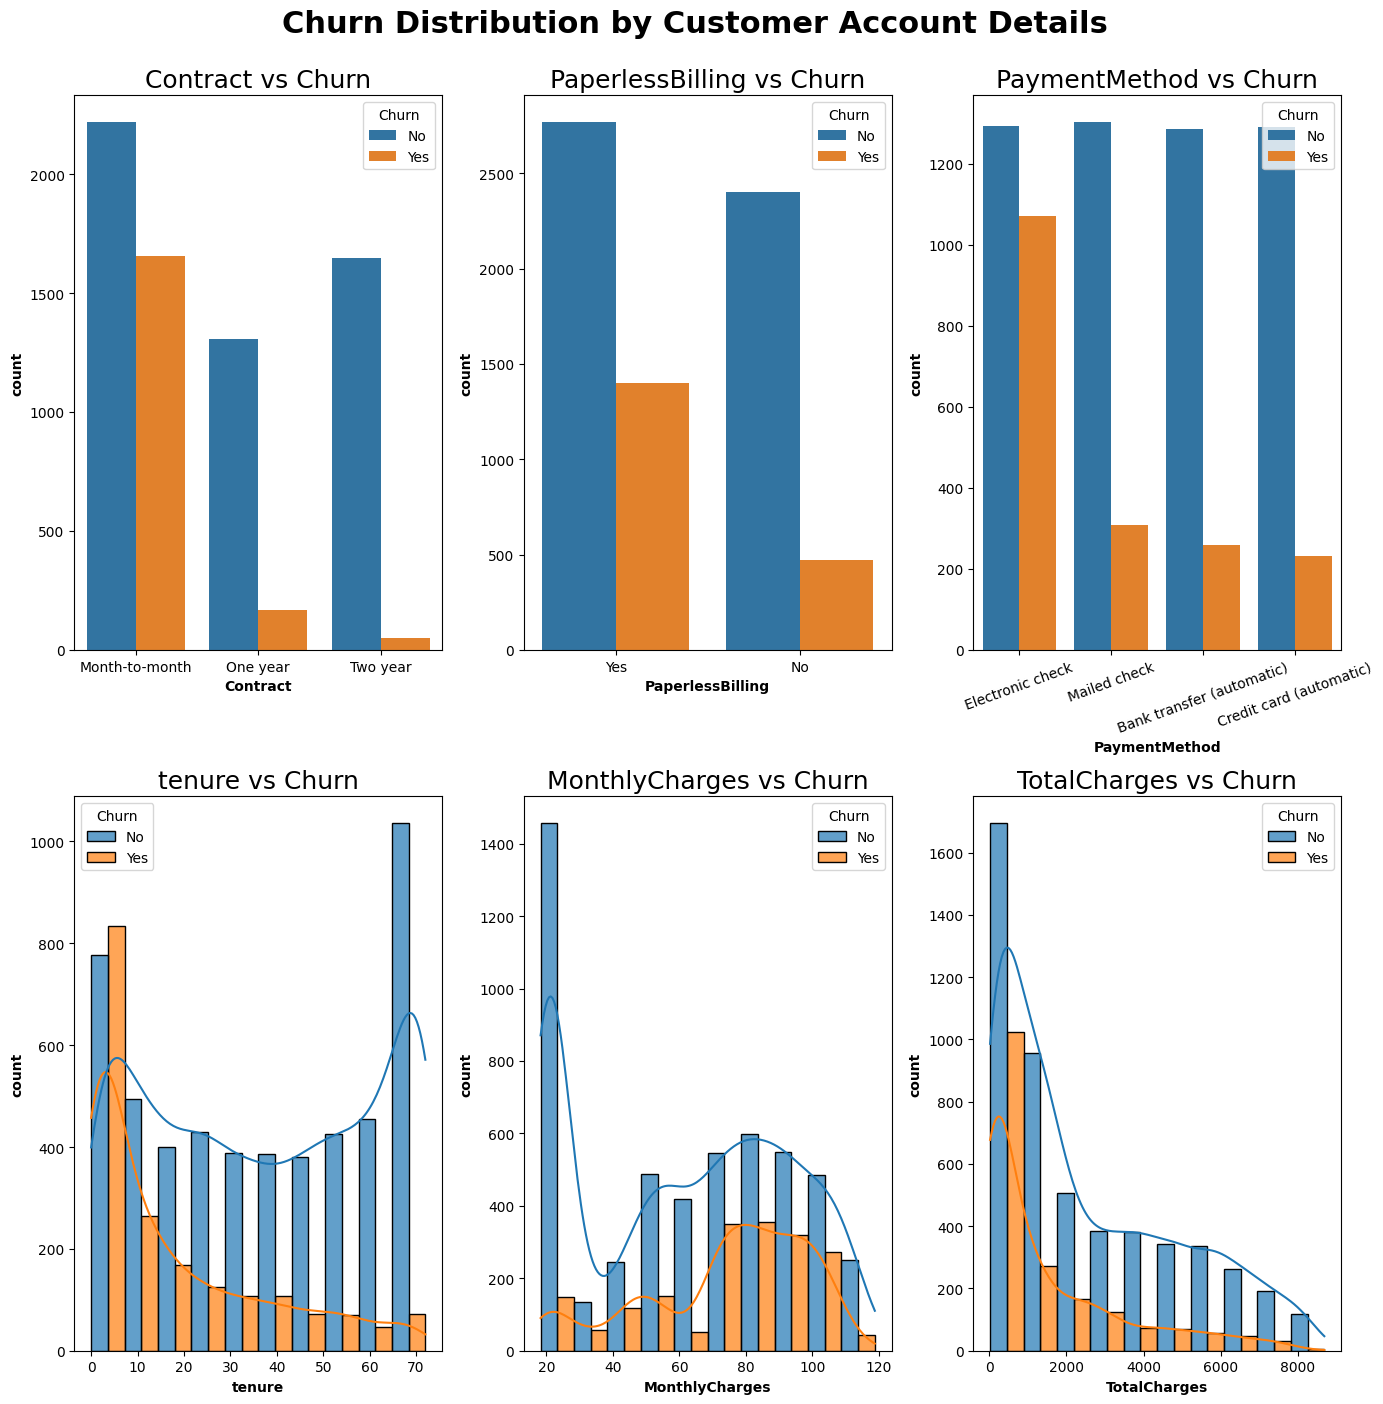

In [14]:
# Creating subplots for distribution of chrun by customer account details:

fig,axes= plt.subplots(2,3, figsize=(14,14))
axes= axes.flatten()

# plotting for non_numerical columns:
non_numerical_cols= ['Contract', 'PaperlessBilling','PaymentMethod']
for i,col in enumerate(non_numerical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f"{col} vs Churn",fontsize=18)
    if col=='PaymentMethod':
        axes[i].tick_params(axis='x',rotation=20)
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel("count", fontweight='bold')

# plotting for numerical columns:
numerical_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Churn',ax=axes[i+3],multiple='dodge',kde=True,bins=10, alpha=0.7)
    axes[i+3].set_title(f"{col} vs Churn",fontsize=18)
    axes[i+3].set_xlabel(col, fontweight='bold')
    axes[i+3].set_ylabel("count", fontweight='bold')


plt.suptitle("Churn Distribution by Customer Account Details",fontsize=22, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

Contract:

The majority of the customers are on month-to-month contracts and a significant portion of the them have churned. The churn rates are notably lower for those with one-year contracts and lowest for those with two-year contracts.
This suggests that encouraging customers to opt for longer contracts through discounts or loyalty programs could effectively reduce churn.
Paperless Billing:

Customers who opted for paperless billing have a higher churn rate than those who receive paper bills.
This might indicate a lack of customer engagement with online billing or possible confusion with digital payment processes. Improving the digital experience and communication may help.
Payment Method:

The churn rate is significantly higher among customers who use electronic checks compared to those who use other payment methods.
This suggests that the payment method may be inconvenient one. Promoting automated payments might improve retention.
Tenure:

Churn is highest in the early months (within first 10 months) of subscription and gradually decrease over time.
This suggests that initial months are critical for customer retention efforts to establish long-term customer relationships..
Monthly Charges:

Customers paying lower monthly charges have lower churn rates, whereas those paying mid-range amounts(between  
70
a
n
d
  120) exhibit higher churns.
The decline in the churn rate for higher monthly charges might be representing premium subscribers who perceive greater value in the service.
Price optimization and targeted offers may be necessary to address concerns of mid-range paying customers.
Total Charges:

Since the total charge is directly dependent on tenure, customers with lower total charges (short tenure) have higher churn rates and decreases with the increase in total charges( increase in tenure).
Retainging the customers beyond early months can significantly increase their contribution to revenue, emphasizing the need for retention strategies.

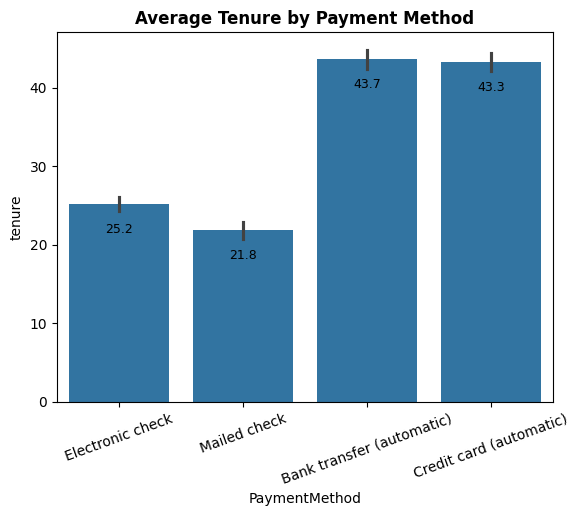

In [15]:
# Creating a barplot for tenure by payment method:

ax=sns.barplot(data=df,x='PaymentMethod',y='tenure')

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.1f}',  # Format the value
                (bar.get_x() + bar.get_width() / 2, bar.get_height()-4),  # Position
                ha='center', va='bottom', fontsize=9)

plt.title("Average Tenure by Payment Method",fontweight='bold')
plt.xticks(rotation=20)
plt.show()

Customers using manual payment methods (electronic check or mailed check) have a significantly shorter average tenure compared to those with automated payments (bank transfer or credit card), indicating a higher likelihood of churn among manual payment users.

In [17]:
# Calculating churn ratio for eacn number of services:

df['Total_Services'] = df.apply(lambda x: x[service_cols].isin(['Yes', 'DSL', 'Fiber optic']).sum(), axis=1)  # new column for total number of services subscribed

churn_ratio= df.groupby('Total_Services')['Churn'].value_counts().unstack()
churn_ratio['Churn_ratio']=churn_ratio['Yes']/churn_ratio['No']
churn_ratio

Churn,No,Yes,Churn_ratio
Total_Services,,,
1,1126,138,0.122558
2,593,266,0.448567
3,466,380,0.815451
4,613,352,0.574225
5,633,289,0.456556
6,676,232,0.343195
7,524,152,0.290076
8,346,49,0.141618
9,197,11,0.055838


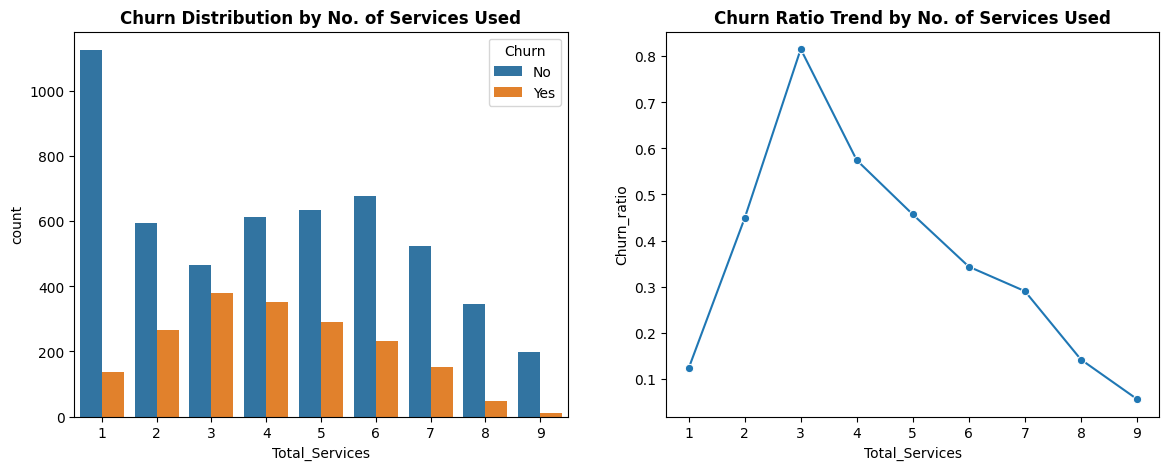

In [18]:
# Creating subplots for churn distribution and churn ratio trend by number of services:

fig,axes= plt.subplots(1,2,figsize=(14,5))

# plot 1:
sns.countplot(data=df,x='Total_Services',hue='Churn', ax=axes[0])
axes[0].set_title("Churn Distribution by No. of Services Used",fontweight='bold')

# plot 2:
sns.lineplot(data=churn_ratio, x=churn_ratio.index,y='Churn_ratio',ax=axes[1], marker='o')
axes[1].set_title("Churn Ratio Trend by No. of Services Used",fontweight='bold')

plt.show()

Churn rate is highest for customers with 3 services while it is lower for both higher and lower number of services. Customers with the lowest and highest number of services seems the most satisfied.

Customers with 3 services typically have internet alone or with very few add-ons, which might not provide enough value, leading to dissatisfaction and churn. Adding more services tends to reduce churn.

Most customers with fewer than 3 services might be using only phone service, which can be the reason for lower churn among them.